<a href="https://colab.research.google.com/github/dvrachakonda/dhruv_varahavenkatasai_rachakondas_projects/blob/main/exploratory_data_analyses/elderly_population_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module Assignment 04 - Analysing the Effect of an Aging Population on Living Costs

By Dhruv Rachakonda <p>
u1244018



#Introduction

The purpose of this expoloratory data analysis is to determine if there is a relationship between the majority age of a country's population, and the cost of living in the country. Id est, is a country more like to have an increase, decrease, or no effect as its population age increases or decreases. As such, I have chosen the following question: **Is there a relationship between the majority age of a given country and its cost of living?** In other words, are certain age groups also impacting living costs?

Let us start off by importing the neccesary libraries to conduct the test.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

import json

#Reading in Data

We will be using two data sets here: The age structure of each country and various cost of living indexes for each country. The age structure is just percentages of people between ages 0-14, 15-65, and 65+ while the living index set is just an index rating of cost of living for each country, with categories such as average rent cost, grocery cost, and an overall cost section.

This is just some code to allow me to use a CSV file uploaded on google drive. It provides a security clearance to allow us to download that file

In [ ]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1XyZeS3Ob4jitafcmBV3RIfLFqB7ZBiQL/view' # The shareable link
id = '1XyZeS3Ob4jitafcmBV3RIfLFqB7ZBiQL' # After the /d/ and before the /view?
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Cost of living index by country 2020.csv')  # Put the name of the file here
cost_df = pd.read_csv('Cost of living index by country 2020.csv') # and here


In [ ]:
cost_df.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53
1,Norway,101.43,36.15,70.21,91.14,109.28,88.38
2,Iceland,100.48,46.95,74.88,86.89,113.74,79.44
3,Japan,83.35,25.97,55.90,81.82,48.95,87.28
4,Denmark,83.00,31.92,58.57,61.74,100.75,100.88


In [ ]:
cost_df.tail()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
127,Uzbekistan,26.01,7.54,17.18,21.59,20.17,24.31
128,Syria,25.31,5.68,15.92,22.42,21.38,11.46
129,India,24.58,5.68,15.54,24.55,17.17,54.30
130,Afghanistan,24.24,4.03,14.58,17.70,17.38,28.20
131,Pakistan,21.98,4.59,13.66,19.08,16.78,30.57


Here is the same code for the other file.

In [ ]:
link = 'https://drive.google.com/file/d/1Gxj-x19Hc43OZLiYKZsOQobp28dy_zrj/view?usp=sharing' # The shareable link
id = '1Gxj-x19Hc43OZLiYKZsOQobp28dy_zrj' # After the /d/ and before the /view?
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Cost of living index by country 2020.csv')  # Put the name of the file here
age_df = pd.read_csv('Cost of living index by country 2020.csv') # and here

In [ ]:
age_df.head()

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years
0,Japan,12.90%,60.10%,27%
1,Italy,13.50%,63.50%,23%
2,Portugal,13.60%,64.90%,22%
3,Germany,13.10%,65.50%,22%
4,Finland,16.40%,62.40%,21%


In [ ]:
age_df.tail()

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years
186,Gambia,45.30%,52.30%,2%
187,Kuwait,21.10%,76.60%,2%
188,Uganda,47.70%,50.10%,2%
189,Qatar,13.90%,84.80%,1%
190,United Arab Emirates,13.90%,85.00%,1%


My intentions here are to combined both of these data sets by adding the three columns in the age data set to the cost data set. First, let us go through the checklist of combining data sets.

# **Variables:** <p>
Let us see what variables these two sets have in common, although I'm sure country is the only thing they do have in common

In [ ]:
set(age_df.columns) & set(cost_df.columns)

{'Country'}

I am going to use the "Country" column as the key for joining. Let us also check how the two cantidate variables overlap:

In [ ]:
"There are {0:,} unique values in the 'Cost Index Set".format(len(cost_df['Country'].unique()))

"There are 132 unique values in the 'Cost Index Set"

In [ ]:
"There are {0:,} unique values in the 'Ages Set".format(len(age_df['Country'].unique()))

"There are 191 unique values in the 'Ages Set"

It looks like there are more countries in the ages set than in the cost index set.

Let us also see what values are NOT in each other's sets

In [ ]:
in_ages_but_not_cost_set = set(age_df['Country'].unique()) - set(cost_df['Country'].unique())

in_cost_but_not_ages_set = set(cost_df['Country'].unique()) - set(age_df['Country'].unique())

print("There are {0:,} \"Country\"s in ages but not in cost.".format(len(in_ages_but_not_cost_set)))
print("There are {0:,} \"Country\"s in cost but not in ages.".format(len(in_cost_but_not_ages_set)))

There are 64 "Country"s in ages but not in cost.
There are 5 "Country"s in cost but not in ages.


# **Coverage**

We can determine if the coverage of both sets is within the same or generally close range of time, as a country's age is extremely unlikely to change within the span of a few years. However, we can see based on the description from Kaggle that all the data sets, including cost index and age structure is from the year 2020: https://www.kaggle.com/datasets/dumbgeek/countries-dataset-2020?select=Cost+of+living+index+by+country+2020.csv


# **Duplicates**

Let us also see if there are any duplicate values in both our data sets

In [ ]:
age_df['Country'].value_counts().head()

Japan         1
Laos          1
Gabon         1
Uzbekistan    1
Libya         1
Name: Country, dtype: int64

In [ ]:
cost_df['Country'].value_counts().head()

Switzerland               1
Malaysia                  1
Serbia                    1
Mexico                    1
Bosnia And Herzegovina    1
Name: Country, dtype: int64

It appears there are no duplicated data sets at all, which is completely expected. We can continue with our conjoining prechecks.

#Strategy

For this join, where ages is the left data set and cost is the right data set, I intend to do a left join. This is because joining with ages would result in the most amount of countries kept post merge, and will give me more control as to what I would like to do with the expected null values during the cleaning phase.

In [ ]:
left_df = pd.merge(left = age_df,
                                  right = cost_df,
                                  left_on = 'Country',
                                  right_on = 'Country',
                                  how='left')
print("Merge Complete")

Merge Complete


#Shape

After the join, I am expecting 191 columns and 10 rows. This is because the age had three rows and cost had six, and both had the country row. Since we are doing a left based merge where age was the left data set, I am expecting the  merged data to have 191 columns

In [ ]:

print("There are {0:,} rows and {1:,} columns.".format(*left_df.shape))
print("There are {:,} unique values for \"Country\" in the left join.".format(len(left_df['Country'].unique())))



There are 191 rows and 10 columns.
There are 191 unique values for "Country" in the left join.


I am expecting ZERO repeat values


In [ ]:
left_df['Country'].value_counts().head()

Japan         1
Laos          1
Gabon         1
Uzbekistan    1
Libya         1
Name: Country, dtype: int64

I am, however, expecting some null values. These will be null values for countries that were not in cost, but were in ages. So those countries that were not in age, but were in costs, will have null values for all the cost related columns, such as rent index and overall cost index.

In [ ]:
left_df.isna().sum()

Country                            0
Age 0 to 14 Years                  0
Age 15 to 64 Years                 0
Age above 65 Years                 0
Cost of Living Index              64
Rent Index                        64
Cost of Living Plus Rent Index    64
Groceries Index                   64
Restaurant Price Index            64
Local Purchasing Power Index      64
dtype: int64

Referring to earlier, we did notice that there were 64 countries that were not present in the ages index, so as such this makes sense.

I intend to do standard cleaning from here with the null values, and will decide later on in the analysis whether to do imputing or deletion.

We can now begin the exploratory data analysis.

In [ ]:
countries = left_df #renaming to nicer name for data frame

#Reading in Data

We have already read in our data, and combined it. We can move on to the next phase here.

#Checking packaging

In [ ]:
countries.shape

(191, 10)

It appears that we are working with ten rows and 191 columns. However, the number of columns has potential to decrease, since there are countries with null values which are going to be dropped during our cleaning process. Additionally, we only care about the rows that have both percentage of a given age group. I will test out the three rows related to age group, and do three tests with age group vs cost of living.

#Examining Top and Bottom of Data



In [ ]:
countries.head()

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Japan,12.90%,60.10%,27%,83.35,25.97,55.90,81.82,48.95,87.28
1,Italy,13.50%,63.50%,23%,67.26,21.22,45.24,55.44,72.32,65.59
2,Portugal,13.60%,64.90%,22%,49.52,21.81,36.27,38.14,42.48,49.43
3,Germany,13.10%,65.50%,22%,65.26,27.06,46.99,49.23,61.58,102.36
4,Finland,16.40%,62.40%,21%,70.29,26.16,49.18,56.52,76.81,99.93


In [ ]:
countries.tail()

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
186,Gambia,45.30%,52.30%,2%,NaN,NaN,NaN,NaN,NaN,NaN
187,Kuwait,21.10%,76.60%,2%,50.37,31.21,41.21,34.68,47.08,85.59
188,Uganda,47.70%,50.10%,2%,30.18,10.15,20.60,25.25,22.14,20.50
189,Qatar,13.90%,84.80%,1%,64.04,47.44,56.10,53.61,66.83,111.69
190,United Arab Emirates,13.90%,85.00%,1%,61.98,41.07,51.98,47.63,61.32,91.58


Through examining the tail, we can see an example of a country that is not in the  cost of living index, but is in the age index in the nation of Gambia. Nations like that are likely missing not at random (MNAR) since these are third world countries which may have data that is harder to get.  

#Checking N's

Since every column represents a singular nation, we are working with 193 columns here. Additionaly, each column has ten attributes.

In [ ]:
countries.head(1)

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Japan,12.90%,60.10%,27%,83.35,25.97,55.9,81.82,48.95,87.28


In [ ]:
countries.shape

(191, 10)

In this case, we are going to be doing three different tests. We will be making the x axis percent ages three times. Additionally, I have decided to test just cost of living plus rent index. It would be too messy and complicated to test multiple other cost facts such as rent and restaurant price indexes.

#Validation Against External Data Source

We can take just one country and see its percetage age for that year. I'm using japan here.

https://www.stat.go.jp/english/data/handbook/c0117.html#:~:text=On%20the%20other%20hand%2C%20in,percent%20of%20the%20entire%20population.

According to the statistical handbook of Japan, made by the Japanese Ministry of Internal Affairs, their ages 0-14 is 12%, which matches the data set. Tt was 60% for 15-64, and 65+ was also 28.8%. All of these values are extremely close to the given data set, and we can conclude that this data is accurate.

#Cleaning Through Deletion

I have opted to proceed with this analysis by conducting deletion on any missing values. I would also attempt impution, but I cannot think of an efficient way of imputing missing values without having to google 69 individual countries times five columns worth of data. We will lose a large percentage of data, however there will still be a reasonable large amount of data, making this analysis valid.

We'll go ahead and drop NaNs for any missing values in our relevent data.

In [ ]:
dropped_countries = countries.dropna(subset = ['Age 0 to 14 Years'])
print("There are {0:,} rows of data after dropping, compared to {1:,} before.".format(len(dropped_countries), len(countries)))


There are 191 rows of data after dropping, compared to 191 before.


No NaN values in that row, we'll move to the next row

In [ ]:
dropped_countries = countries.dropna(subset = ["Age 15 to 64 Years"])
print("There are {0:,} rows of data after dropping, compared to {1:,} before.".format(len(dropped_countries), len(countries)))


There are 191 rows of data after dropping, compared to 191 before.


Still no NaN values. Moving on

In [ ]:
dropped_countries = countries.dropna(subset = ["Age above 65 Years"])
print("There are {0:,} rows of data after dropping, compared to {1:,} before.".format(len(dropped_countries), len(countries)))


There are 191 rows of data after dropping, compared to 191 before.


I know that there should be no NaN values being dropped since we did a left based join, which kept all the values in the age data set. However, I wanted to run a dropna function on the data set to prove this.

Since we only care about cost of living index here, we're going to drop any country that is missing a cost of living index.

In [ ]:
dropped_countries = countries.dropna(subset = ["Cost of Living Index"])
print("There are {0:,} rows of data after dropping, compared to {1:,} before.".format(len(dropped_countries), len(countries)))

dropped_countries.head()

There are 127 rows of data after dropping, compared to 191 before.


,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Japan,12.90%,60.10%,27%,83.35,25.97,55.90,81.82,48.95,87.28
1,Italy,13.50%,63.50%,23%,67.26,21.22,45.24,55.44,72.32,65.59
2,Portugal,13.60%,64.90%,22%,49.52,21.81,36.27,38.14,42.48,49.43
3,Germany,13.10%,65.50%,22%,65.26,27.06,46.99,49.23,61.58,102.36
4,Finland,16.40%,62.40%,21%,70.29,26.16,49.18,56.52,76.81,99.93


This results in a 33% loss rate. Certainly not ideal, however it is not too high that it may affect our conclusion.

Indeed, I am aware that we could have simply done a right join. I did a left join because I wanted to keep all the countries in the data set, and it would allow me to have control of what data values I would want to drop. Since that joining occured earlier in the analysis, I would not have known much about how the data would have looked like post deletion and post joining. However, now I know that our data is nothing but a post right join data. I just preferred a method that would give a loss of the least data initially before doing more familiar clean up methods

Let's also remove the percentage symbol and convert all the values to int

In [ ]:
dropped_countries["Age above 65 Years"] = dropped_countries["Age above 65 Years"].str[:-1]
dropped_countries["Age above 65 Years"] = dropped_countries["Age above 65 Years"].str.strip()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dropped_countries["Age above 65 Years"] = pd.to_numeric(dropped_countries["Age above 65 Years"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dropped_countries.head()

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Japan,12.90%,60.10%,27,83.35,25.97,55.90,81.82,48.95,87.28
1,Italy,13.50%,63.50%,23,67.26,21.22,45.24,55.44,72.32,65.59
2,Portugal,13.60%,64.90%,22,49.52,21.81,36.27,38.14,42.48,49.43
3,Germany,13.10%,65.50%,22,65.26,27.06,46.99,49.23,61.58,102.36
4,Finland,16.40%,62.40%,21,70.29,26.16,49.18,56.52,76.81,99.93


In [ ]:
dropped_countries.tail()

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
184,Bahrain,19.70%,77.90%,2,58.94,30.95,45.55,48.11,54.55,57.88
187,Kuwait,21.10%,76.60%,2,50.37,31.21,41.21,34.68,47.08,85.59
188,Uganda,47.70%,50.10%,2,30.18,10.15,20.60,25.25,22.14,20.50
189,Qatar,13.90%,84.80%,1,64.04,47.44,56.10,53.61,66.83,111.69
190,United Arab Emirates,13.90%,85.00%,1,61.98,41.07,51.98,47.63,61.32,91.58


#Visualization

I intend to use a dot plot due to the number of values. There are around 120 values, so as such it would make sense to be able to see all the individual points and their correlation.

The x-axis here is going to be percent ages 0 to 14.

Let's sort the original x-axis first.

In [ ]:
dropped_countries = dropped_countries.sort_values(by=['Age above 65 Years'])

In [ ]:
dropped_countries.head()

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
190,United Arab Emirates,13.90%,85.00%,1,61.98,41.07,51.98,47.63,61.32,91.58
189,Qatar,13.90%,84.80%,1,64.04,47.44,56.10,53.61,66.83,111.69
187,Kuwait,21.10%,76.60%,2,50.37,31.21,41.21,34.68,47.08,85.59
184,Bahrain,19.70%,77.90%,2,58.94,30.95,45.55,48.11,54.55,57.88
182,Oman,21.80%,75.80%,2,49.28,17.98,34.31,43.50,44.26,80.97


In [ ]:
dropped_countries.tail()

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
4,Finland,16.40%,62.40%,21,70.29,26.16,49.18,56.52,76.81,99.93
3,Germany,13.10%,65.50%,22,65.26,27.06,46.99,49.23,61.58,102.36
2,Portugal,13.60%,64.90%,22,49.52,21.81,36.27,38.14,42.48,49.43
1,Italy,13.50%,63.50%,23,67.26,21.22,45.24,55.44,72.32,65.59
0,Japan,12.90%,60.10%,27,83.35,25.97,55.90,81.82,48.95,87.28


In [ ]:
sb.set(rc = {'figure.figsize':(15,10)})


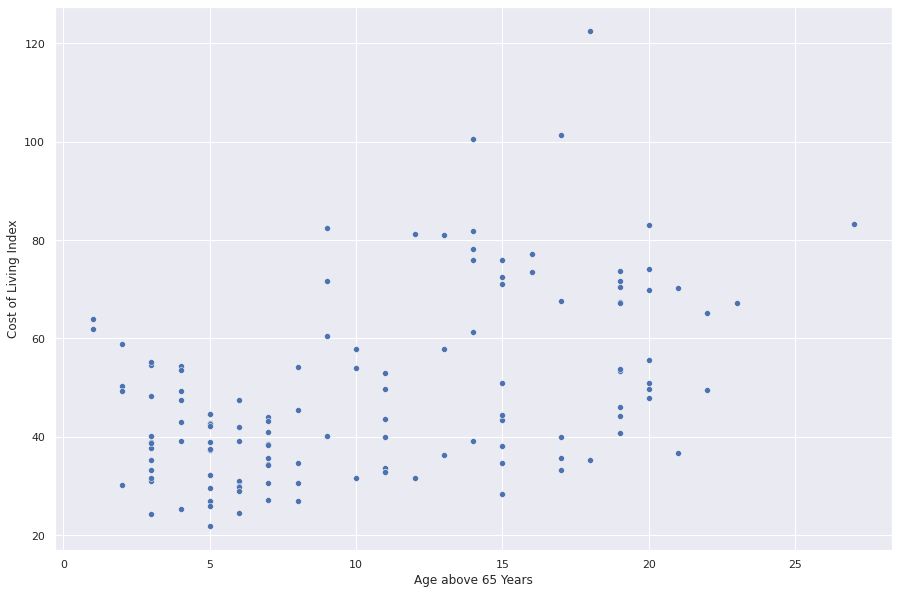

In [ ]:
sb.scatterplot(data=dropped_countries, x="Age above 65 Years", y="Cost of Living Index")

We'll visualise it with the X axis being between 15-64



In [ ]:
dropped_countries["Age 15 to 64 Years"] = dropped_countries["Age 15 to 64 Years"].str[:-1]
dropped_countries["Age 15 to 64 Years"] = dropped_countries["Age 15 to 64 Years"].str.strip()
dropped_countries["Age 15 to 64 Years"] = pd.to_numeric(dropped_countries["Age 15 to 64 Years"])
dropped_countries = dropped_countries.sort_values(by=['Age 15 to 64 Years'])

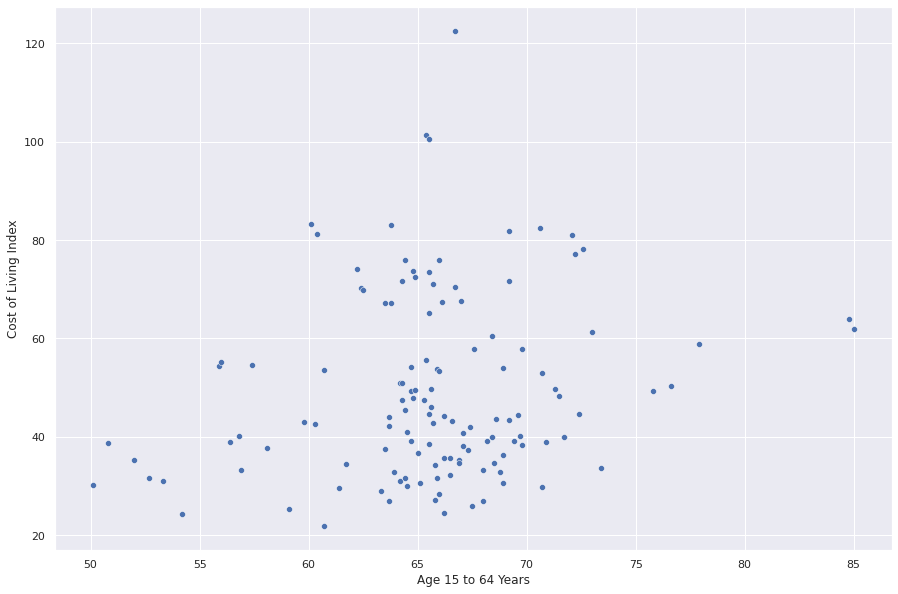

In [ ]:
sb.scatterplot(data=dropped_countries, x="Age 15 to 64 Years", y="Cost of Living Index")

And with the 0-14 axis

In [ ]:
dropped_countries["Age 0 to 14 Years"] = dropped_countries["Age 0 to 14 Years"].str[:-1]
dropped_countries["Age 0 to 14 Years"] = dropped_countries["Age 0 to 14 Years"].str.strip()
dropped_countries["Age 0 to 14 Years"] = pd.to_numeric(dropped_countries["Age 0 to 14 Years"])
dropped_countries = dropped_countries.sort_values(by=['Age 0 to 14 Years'])

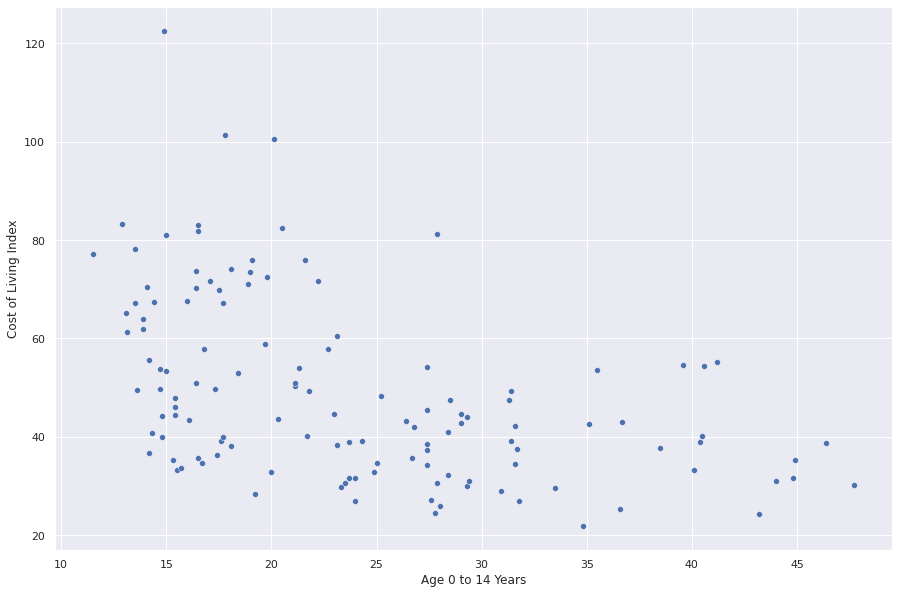

In [ ]:
sb.scatterplot(data=dropped_countries, x="Age 0 to 14 Years", y="Cost of Living Index")

#Simple Test

An idea for a simple statistical test would be inserting a line of best fit for each of the graphs. Whichever graph regression has the highest slope with the line of best fit is the one that has the most impact on the cost of living index.

We can add a regression line for all three graphs:

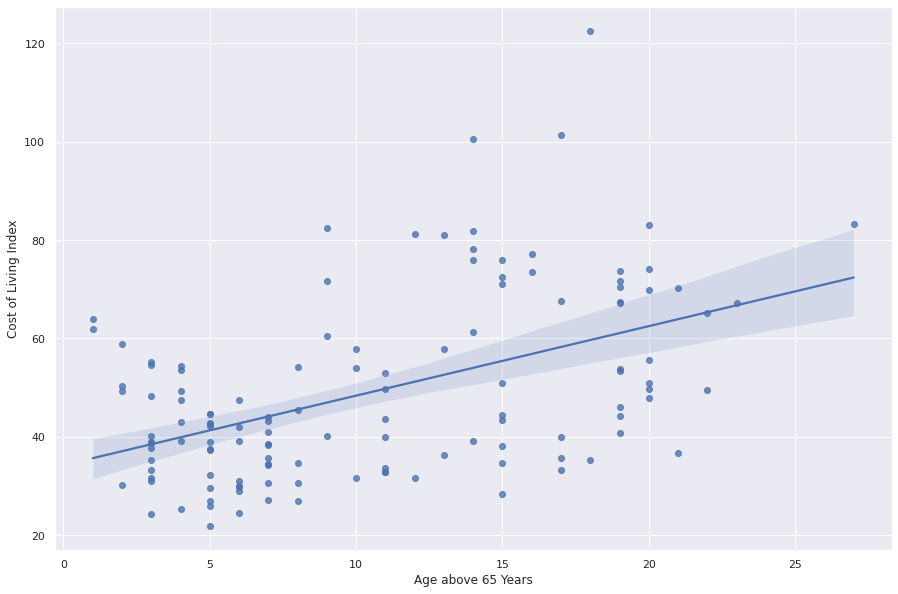

In [ ]:
sb.regplot( x="Age above 65 Years", y="Cost of Living Index", data=dropped_countries);


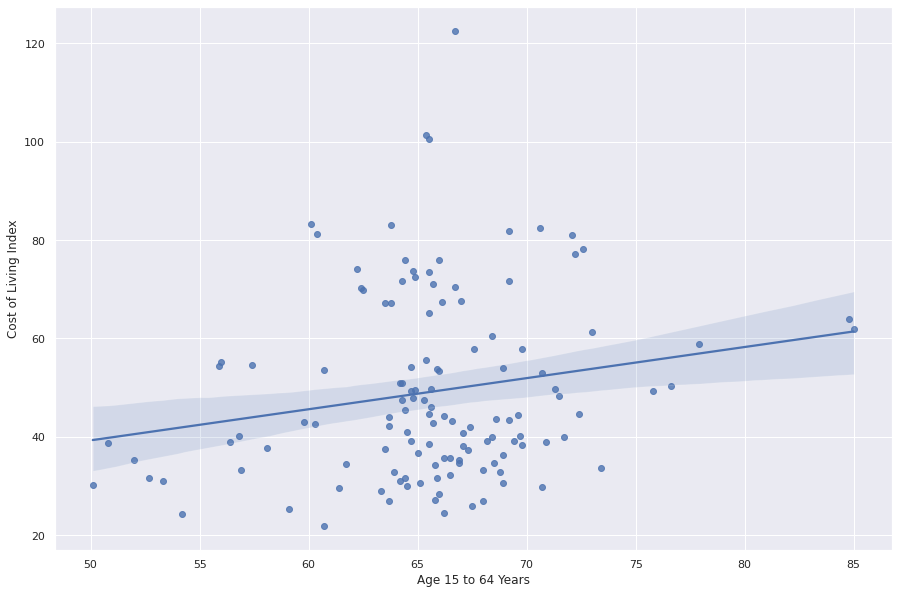

In [ ]:
sb.regplot( x="Age 15 to 64 Years", y="Cost of Living Index", data=dropped_countries);


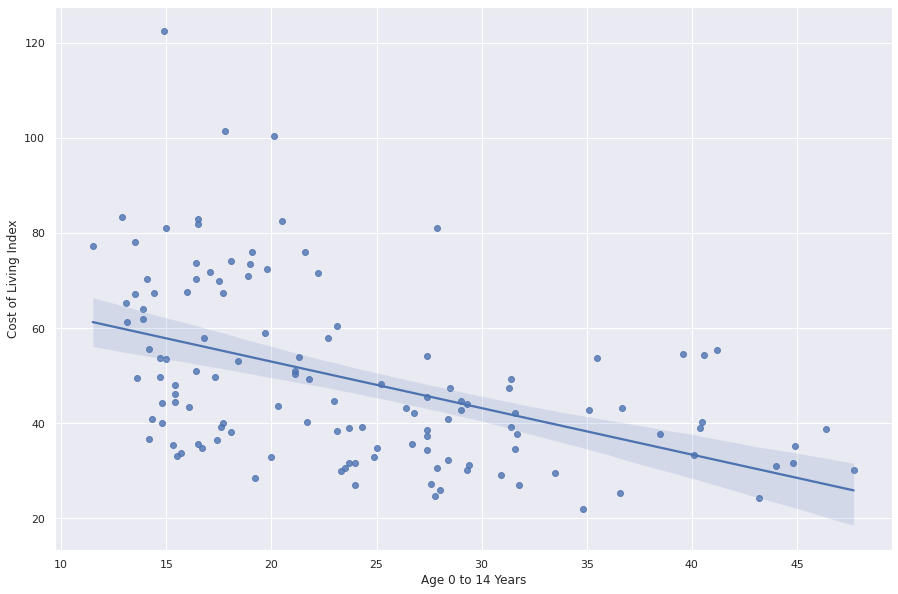

In [ ]:
sb.regplot( x="Age 0 to 14 Years", y="Cost of Living Index", data=dropped_countries);


Based on the regression charts, the more 0-14 year olds that make up a country's population, the less the cost of living becomes. Although both 15-64 years percentage and 65+ percentage populations have a proportional increase as their population percentages increase, it appears from visually looking at the graph that **The Age Group of 65+ causes the highest increase in living costs in a country.**

#Statistical Test

We will be using the Pearson's Correlation Test here. I am going to determine how closely linearly correlated the data for each visualization is. The closer the value is to one, the better correlated the data is.

In [ ]:
from scipy.stats import pearsonr # pearson correlation


In [ ]:
r, p_value = pearsonr(dropped_countries['Age above 65 Years'], dropped_countries['Cost of Living Index'])
print('Correlation: {}'.format(r))
print('P value: {}'.format(p_value))

Correlation: 0.48489556532349354
P value: 7.601859770360424e-09


While there is a correlation that certainly exists, it is only halfway to pure correlation. The results for x = age above 65 is statistically significant, but not to a very high extent.  

In [ ]:
r, p_value = pearsonr(dropped_countries['Age 15 to 64 Years'], dropped_countries['Cost of Living Index'])
print('Correlation: {}'.format(r))
print('P value: {}'.format(p_value))

Correlation: 0.18865461039069395
P value: 0.033660032848852606


This a very poor correlation. The results for x = [15 <= age <= 64] are not very statisically significant.

In [ ]:
r, p_value = pearsonr(dropped_countries['Age 0 to 14 Years'], dropped_countries['Cost of Living Index'])
print('Correlation: {}'.format(r))
print('P value: {}'.format(p_value))

Correlation: -0.46844342098615416
P value: 2.7922653529829038e-08


Similar to the dataset which had x = age above 65 years old, this data is only slightly significant. It's negative value or the correlation, which makes sense considering its downward trend. The results for this data set are statistically significant, but not to a very high extent.

**After the statistical tests, we can conclude with mild confidence that the age group of 65+ is the driving factor in the increase in cost index across the world.**

#Write Up



> The purpose of this exploratory data analysis was to determine if there was a relationship between the percentage that an age group contributed towards a population. For example, are the elderly the biggest driving factor in increasing or decreasing the cost of living in a nation. As such, the question that I decided to investigate was “Is there a certain relationship between the composition of a population’s age and its cost of living index.” I chose this question because I wanted to determine if countries across the world on average were spending more money on the elderly. For this investigation purpose, I have assumed that the cost of living is spiked by taxes.






> My first step in this analysis was reading the data. I decided to use two sets of data. The first set of data was a list of countries and what percentage of age from the groups of ages 0-14, 15-64, and 65+ made up the population of that country. The other dataset was a list of countries that had data for cost indexes such as living cost index, average rent cost, and other costs such as grocery. Most of the values that were present in ages were not present in cost indexes, which was a difference of 64 values. I noticed the thing that was extremely common amongst both data sets was simply the countries, so I decided to use the countries as a key for joining the data sets. For this analysis, I planned to only use the cost of living index, since this index value combines all of these values into a numerical value. The ages data set had more countries missing than the cost data set. I did not want to lose many values of data yet, since I wanted to decide later on how to handle cleaning up the data on my own. As such, I opted for a left based join, which would keep all the countries that were missing in the ages data set, but not the cost data set. The joined data had 64 null values, which I did not believe was worth it to google every individual missing country’s data. As such, I would go ahead and drop these values. This was a near 30% drop rate, and while it wasn’t ideal, it was still an enough number of countries to make an accurate conclusion. Indeed, deleting these values is the same thing as doing a right join. However, I wanted to keep as many values as possible and clean up these values later. This just gave me more control over the data, as opposed to losing it during the joining process very early on. I ended up opting to just delete the NaN values, since imputing them proved to be difficult; they were missing not at random, as most of the countries missing were third world nations, which are naturally hard to obtain data from.








> The visualization that I opted for was a scatter plot. This visualization was chosen because of the amount of data. Since it was in the hundreds, it would be easier to visualize all the data points as opposed to putting it into a line plot, which would make the visualization much less accurate looking. I made three visualizations for each type of x-axis: 0-14, 15-64, and 65+ age percentages. I also made more visualizations with a linear regression line in order to compare the average change of change between all the graphs. After examining the linear regression line, I noticed that the 65+ data set had the highest rate of change in its linear regression. I concluded that the 65+ age group increases the average cost of living the most compared to the other age groups. I did the Pearson correlation coefficient test to verify my results. The results were not very statistically significant, however they held some significance except for the 15-64 age group data set. The two values had pearson values close to 0.5, while the 15-64 set has a value close to 0.2, making it really statistically insignificant.



  
> Some limitations to my conjoining strategy include the fact that it appeared to be a right based join with extra steps. In reality, I could have honestly just joined right and not dropped any values. Additionally, there was truly no way of conjoining without losing values. Googling values, while it is an option, will make it really difficult to verify that the data that is manually being inserted is indeed within the same time frame of the data sets.  
> The applications of this investigation are certainly applicable. Governments can learn to apply certain policies towards the elderly in order to prevent them from taking hits towards the cost of living.



